# Imports

In [2]:
from nlp_preprocessing_functions_copy import *

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing dataset

data = pd.read_csv('train.csv') 


# Reviewing the data shape, columns and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# EDA 

## Initial Data Cleaning

### Missing Data

In [5]:
# Percentage of Data Missing Per Column Above 1%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .01][:152]

Total  Missing Percent
location   2533        33.272035
keyword      61         0.801261

### Duplicates

In [6]:
# Checking for Duplicates 

data[data.duplicated(subset = "text")]

id              keyword        location  \
48       68               ablaze  Live On Webcam   
115     165           aftershock              US   
119     172           aftershock     Switzerland   
164     238  airplane%20accident             NaN   
624     898         bioterrorism             NaN   
...     ...                  ...             ...   
7600  10855                  NaN             NaN   
7607  10867                  NaN             NaN   
7609  10870                  NaN             NaN   
7610  10871                  NaN             NaN   
7611  10872                  NaN             NaN   

                                                   text  target  
48    Check these out: http://t.co/rOI2NSmEJJ http:/...       0  
115   320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...       0  
119   320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...       0  
164   Experts in France begin examining airplane deb...       1  
624                          To fight bioterrorism sir.       0  
...                                                 ...     ...  
7600  Evacuation order lifted for town of Roosevelt:...       1  
7607  #stormchase Violent Record Breaking EF-5 El Re...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  

[110 rows x 5 columns]

In [7]:
# Dropping duplicates because the same text is assigned to both target classes
data.drop_duplicates(subset=['text'],inplace=True)

In [8]:
data[data.duplicated(subset = "text")]

Empty DataFrame
Columns: [id, keyword, location, text, target]
Index: []

### Unique vs Common Words

In [9]:
# Unique words
uniqueWords = list(set(' '.join(data['text']).lower().split(' ')))
count = len(uniqueWords)

# Total words
data['total_words'] = data['text'].str.split().str.len()
data['total_words'].sum()

111621

In [10]:
# Identifing Top 25 common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:25]
freq

the     2536
a       1810
to      1783
in      1724
of      1679
and     1279
I       1190
for      800
is       792
on       758
-        756
you      617
my       545
The      542
with     487
that     484
at       475
by       460
it       415
be       361
from     360
was      357
have     348
are      336
this     332
dtype: int64

In [11]:
# Identify the least 25 uncommon words
freq1 =  pd.Series(' '.join(data['text']).split()).value_counts()[-25:]
freq1

52.214904                  1
5.139055                   1
please.                    1
#soundcloud                1
Nottingham                 1
http://t.co/GFDhFMPCEl     1
Grandeur                   1
M?.?O?.?P?.?)              1
@mwnhappy                  1
http://t.co/s9soAeVcVo     1
@WoundedPigeon             1
http://t.co/h9FSIaxv3Q     1
https://t.co/PRojeAvG8T    1
Mello                      1
Hilversum                  1
#HHBU                      1
http://t.co/Jn8S0DrWbP     1
Intel                      1
@channelstv:That's         1
sexy?                      1
@OpTic_Scumper             1
surface.                   1
meters                     1
800                        1
http://t.co/YmY4rSkQ3d     1
dtype: int64

In [12]:
# Dropping ID column by name

data = data.drop(['id'], axis = 1)

In [13]:
# Checking Removal of ID Column

data.head()

keyword location                                               text  target  \
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1   
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1   
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1   
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1   
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1   

   total_words  
0           13  
1            7  
2           22  
3            8  
4           16

In [14]:
sum(data['target'] == 0)

4305

In [15]:
sum(data['target'] == 0) / (4342+3271)

0.5654800998292394

In [16]:
sum(data['target'] == 1)

3198

In [17]:
sum(data['target'] == 1) / (4342+3271)

0.42007093130172074

## Visualizations

In [18]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html

In [19]:
# seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, 
#                   hue_order=None, orient=None, color=None, palette=None, 
#                   saturation=0.75, dodge=True, ax=None, **kwargs

### Total Words

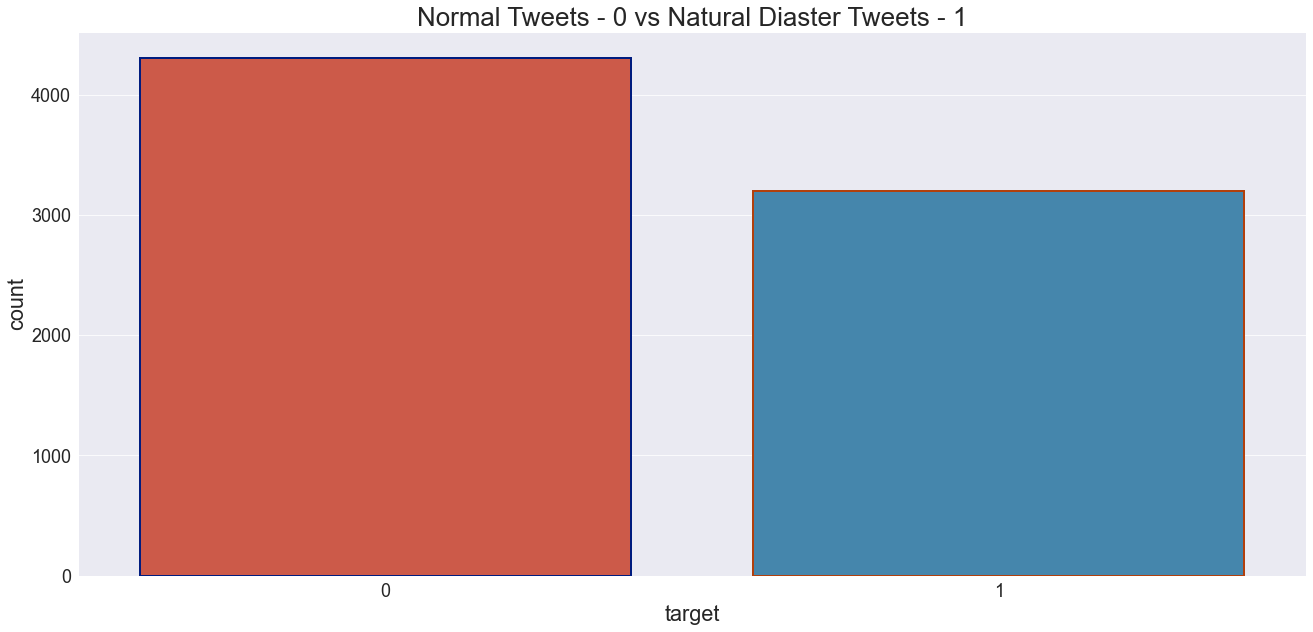

In [20]:
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.countplot(x = "target", 
                   data = data,
                   linewidth = 2,
                   edgecolor = sns.color_palette("dark", 24)).set_title("Normal Tweets - 0 vs Natural Diaster Tweets - 1")

In [21]:
data['total_words'].mean()

14.87684926029588

In [22]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = data['total_words'], 
                           name = "count", 
                           texttemplate = "%{x}", 
                           textfont_size = 20))
fig.show()

In [23]:
(data[(data['target'] == 0)]['total_words']).mean()

14.681068524970964

In [24]:
(data[(data['target'] == 1)]['total_words']).mean()

15.140400250156349

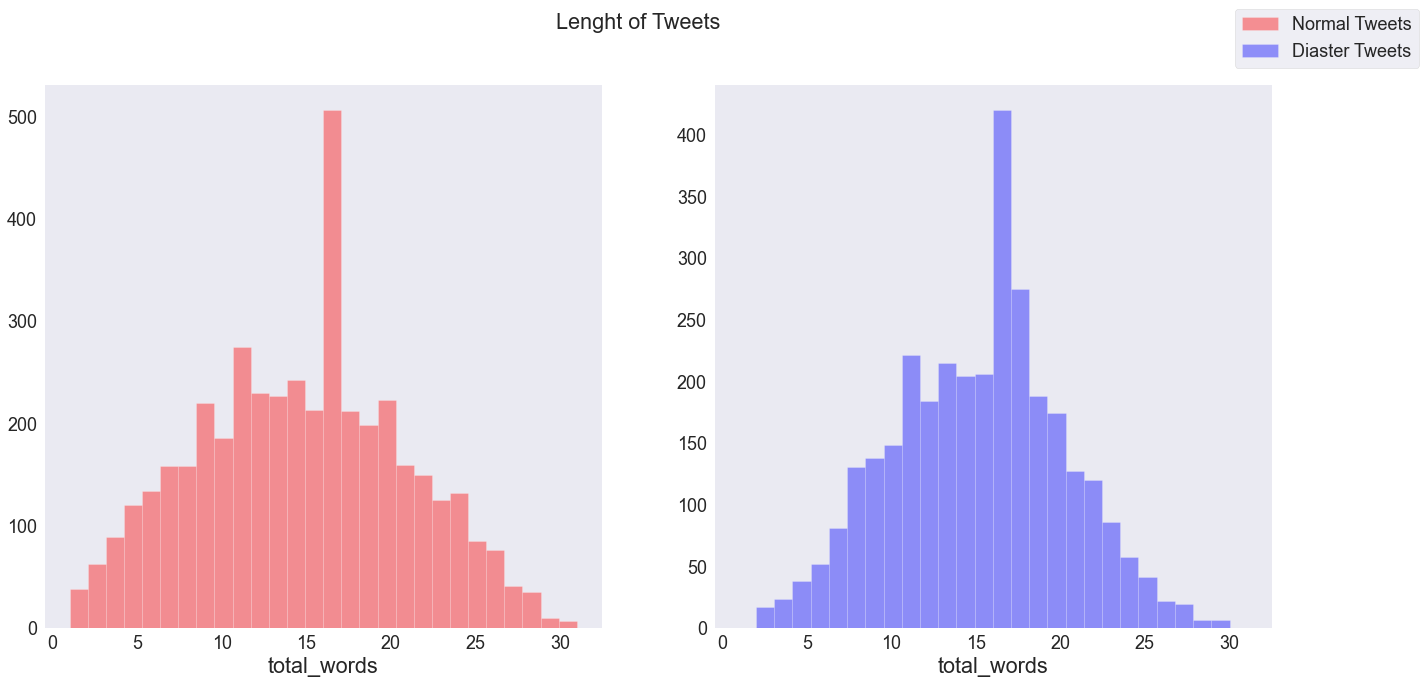

In [25]:
# Create visualization of the distribution of text length in comparision to target feature

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)

sns.distplot(data[(data['target'] == 0)]['total_words'], 
             ax = ax1, 
             kde = False, 
             color = 'red',
             label = 'Normal Tweets')

sns.distplot(data[(data['target'] == 1)]['total_words'],
             ax = ax2, 
             kde = False, 
             color = 'blue',
             label = 'Diaster Tweets');

fig.suptitle('Length of Tweets')
fig.legend(loc = 'upper right')
ax1.grid()
ax2.grid()
plt.show();

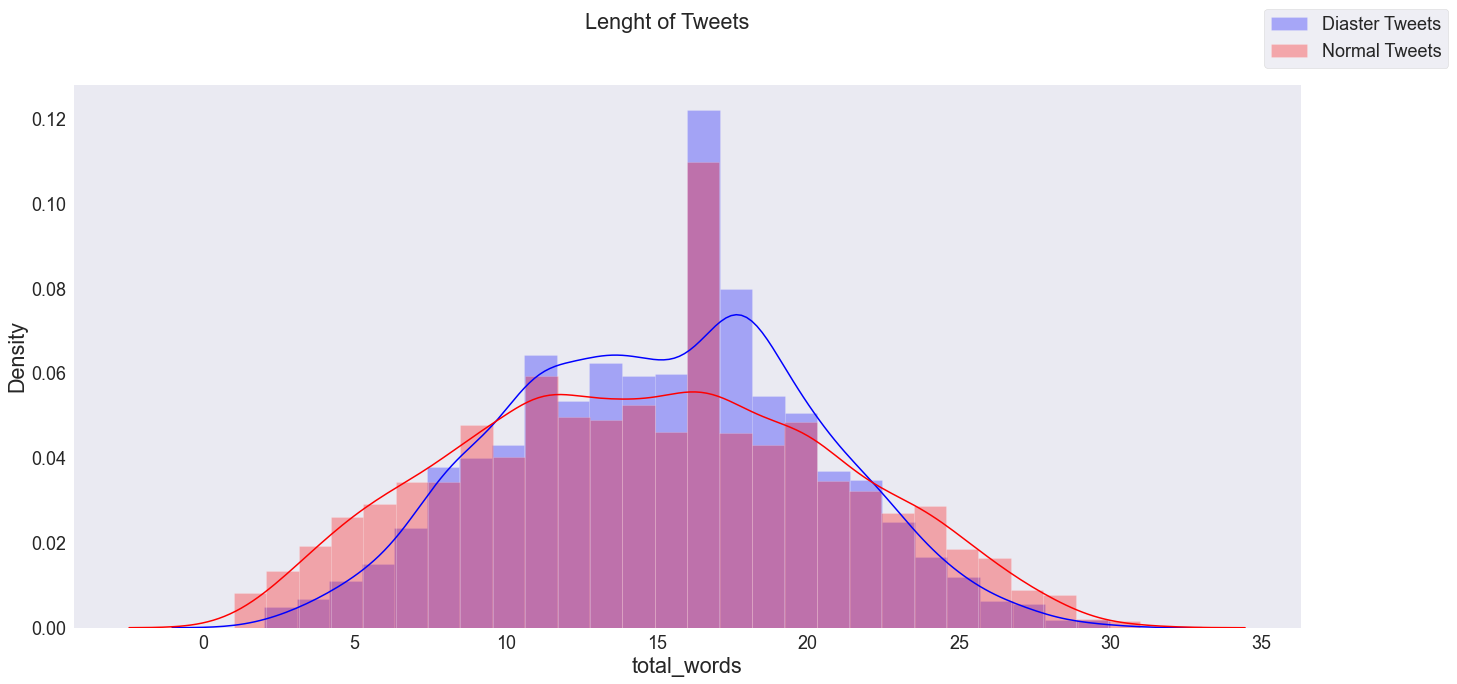

In [26]:
# Create visualization of the distribution of text length in comparision to target feature

fig, ax = plt.subplots()

sns.distplot(data[(data['target'] == 1)]['total_words'],
             ax = ax, 
             kde = True, 
             color = 'blue',
             label = 'Diaster Tweets',
             hist_kws = dict(alpha = .3))

sns.distplot(data[(data['target'] == 0)]['total_words'], 
             ax = ax, 
             kde = True, 
             color = 'red',
             label = 'Normal Tweets',
             hist_kws = dict(alpha = .3));

fig.suptitle('Lenght of Tweets')
fig.legend(loc = 'upper right')
ax.grid()
plt.show();

#### Word Clouds

##### Non Disaster Word Cloud

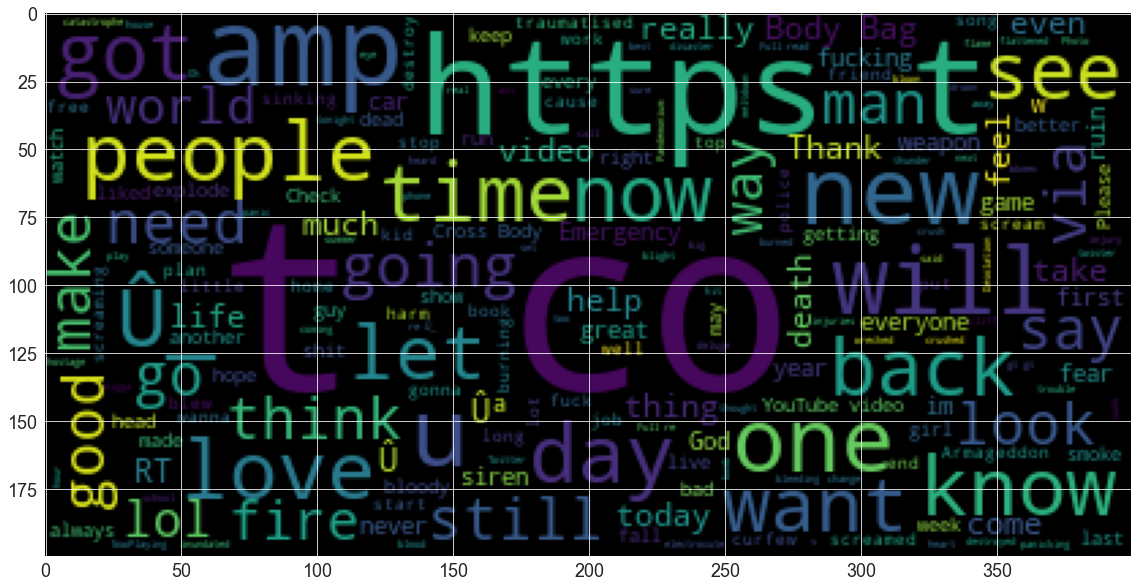

In [27]:
normal_tweet_text = (data[(data['target'] == 0)]['text']).tolist()

normal_tweet_text_as_one_string = ' '.join(normal_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(normal_tweet_text_as_one_string));

##### Disaster Wordcloud

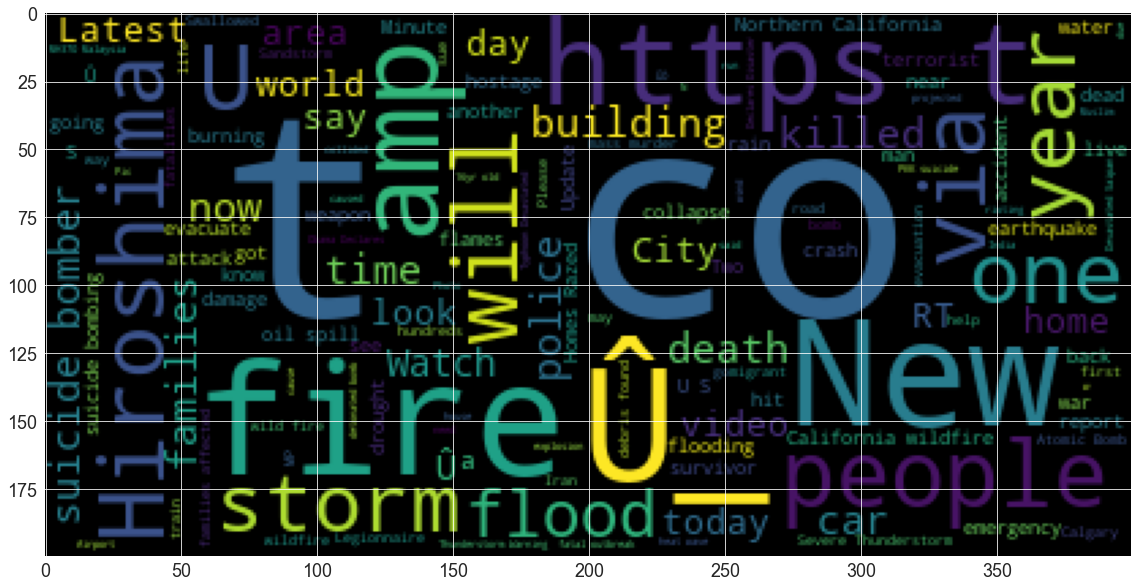

In [28]:
diaster_tweet_text = (data[(data['target'] == 1)]['text']).tolist()

diaster_tweet_text_as_one_string = ' '.join(diaster_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(diaster_tweet_text_as_one_string));

### Keywords

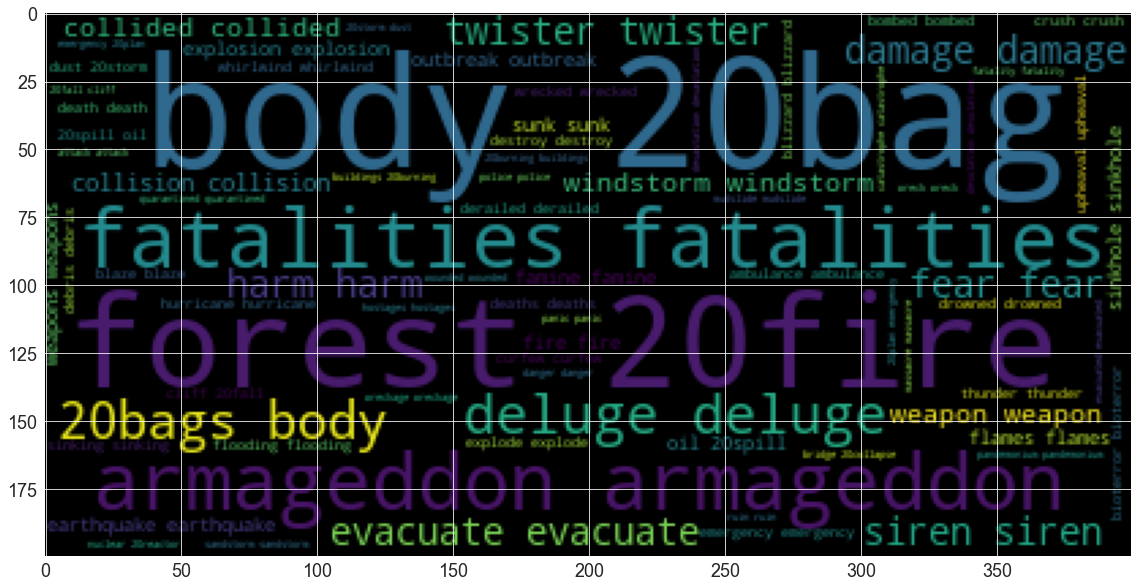

In [29]:
keyword = data['keyword'].dropna()
keyword_tweet_text = keyword.tolist()
keyword_tweet_text_as_one_string = ' '.join(keyword_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(keyword_tweet_text_as_one_string));

### Location

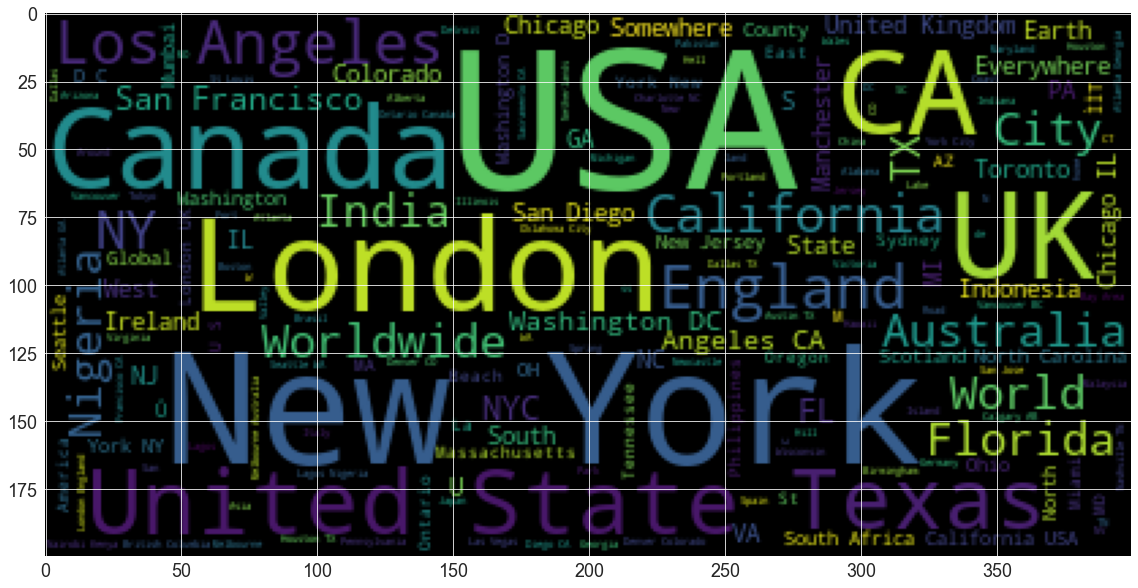

In [30]:
location = data['location'].dropna()
location_tweet_text = location.tolist()
location_tweet_text_as_one_string = ' '.join(location_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(location_tweet_text_as_one_string));

# Cleaning Text Data

In [31]:
# Using the NLP Preprocessing Functions from the Py File for Cleaning

In [32]:
sample = data.text[100]

In [33]:
sample

'.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad'

In [34]:
text_preprocesser_nlp(sample)

'police previously die road accident kill explosion'

In [35]:
# Cleaning the entire text column for the train  dataset

In [36]:
data['text'] = data.text.apply(lambda text: text_preprocesser_nlp(text))

In [37]:
data.sample(frac = .2)

keyword                        location  \
6539           survived             Mumbai, Maharashtra   
5924           screamed                             NaN   
5126  nuclear%20reactor                             NaN   
5381              panic                       Maryland    
4077               hail                        Arkansas   
...                 ...                             ...   
6641          terrorist             Sanganer, Rajasthan   
2221             deluge          Mostly Wellington, NZ    
7240            weapons                    Vermont, USA   
5139  nuclear%20reactor  SE London(heart is by the sea)   
6658          terrorist  Iraq|Afghanistan| RSA |Baghdad   

                                                   text  target  total_words  
6539  miracle mankind survive year bad day history b...       1           28  
5924  run earbud realize mean probably politely hi j...       0           26  
5126           nuclear reactor airgun great way deliver       0           11  
5381                concern panic game leave game leave       0           20  
4077  strong thunderstorm mile north japan move mph ...       1           24  
...                                                 ...     ...          ...  
6641                        jammy soft target terrorist       1            8  
2221  light rain forecast base dress light rain ince...       0           16  
7240  think plan retirement check weapon mass instru...       0           19  
5139   roll sardine gentle lap sea gull nuclear reactor       1           18  
6658      woman get problem thing interesting expensive       0           16  

[1501 rows x 5 columns]

In [38]:
# Additonal Cleaning: Removing low occurrence words (Word count of less than 5)

In [39]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()
low_freq = list(freq.loc[freq < 5].index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

In [40]:
# Identifing Top 25 common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:25]
freq

like         391
fire         351
new          239
go           225
get          214
people       209
kill         170
burn         169
time         168
video        167
crash        163
year         160
bomb         160
come         157
attack       153
emergency    153
pm           152
want         151
body         151
day          150
look         148
man          147
disaster     146
know         145
news         141
dtype: int64

In [41]:
# Identify the least 25 uncommon words
freq1 =  pd.Series(' '.join(data['text']).split()).value_counts()[-25:]
freq1

alaska           5
bore             5
bind             5
pacific          5
whale            5
toronto          5
iranian          5
purple           5
ally             5
swimming         5
drinking         5
port             5
flip             5
demonstration    5
recipe           5
demon            5
burning          5
bike             5
clothe           5
weight           5
plate            5
ton              5
meeting          5
multiple         5
tigers           5
dtype: int64

#### Non-Disaster Wordcloud

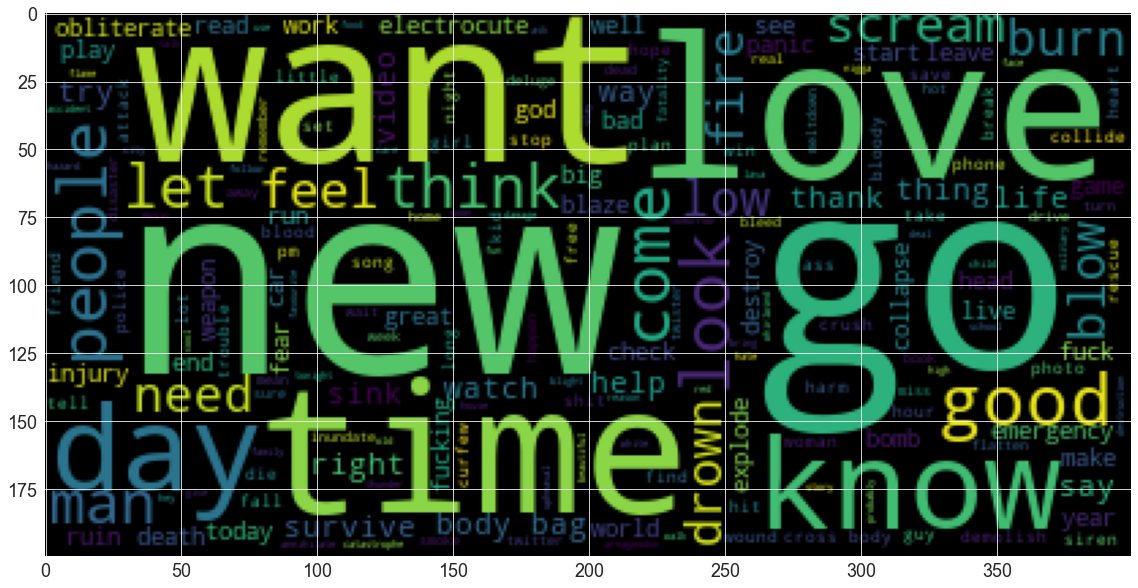

In [42]:
clean_normal_tweet_text = (data[(data['target'] == 0)]['text']).tolist()

clean_normal_tweet_text_as_one_string = ' '.join(clean_normal_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(clean_normal_tweet_text_as_one_string));

#### Distaster Wordcloud

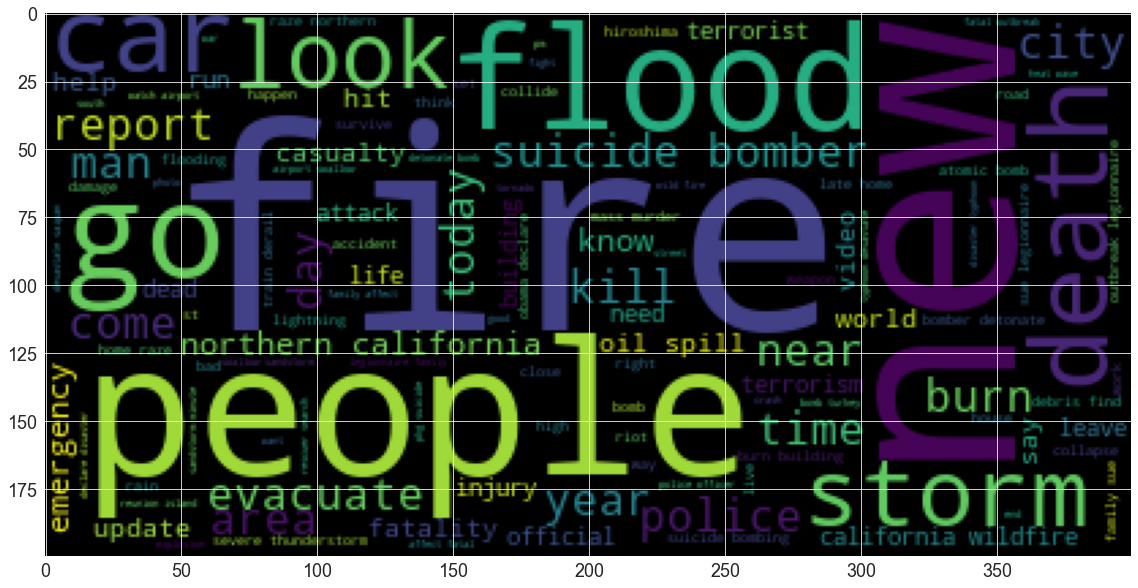

In [43]:
clean_diaster_tweet_text = (data[(data['target'] == 1)]['text']).tolist()

clean_diaster_tweet_text_as_one_string = ' '.join(clean_diaster_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(clean_diaster_tweet_text_as_one_string));

# Export Cleaned Data for Modeling

In [44]:
#data.to_csv('preprocessed_clean_train_set.csv', index = False)